# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/1mg-medicines-order-online-dataset/1mgData.csv


# Load the Dataset

In [3]:
#Read the dataset
df = pd.read_csv('/kaggle/input/1mg-medicines-order-online-dataset/1mgData.csv')

In [4]:
df.head()

,Name,pack_size,rating_count,rating,price,mrp
0,Tata 1mg Glucosamine HCL 1500 mg Tablets for J...,bottle of 60 tablets,284 ratings,4.1,₹995,₹399
1,"Tata 1mg Multivitamin Supreme, Zinc, Calcium a...",bottle of 60 capsules,820 ratings,4.1,₹995,₹498
2,HealthVit Lgm 500mg Capsule,bottle of 60 capsules,No reviews,Nan,₹1200,₹980
3,Zincovit Tablet,strip of 15 tablets,4433 ratings,4.5,₹105,₹89
4,Tata 1mg Vitamin B Complex Capsules,bottle of 60 capsules,7 ratings,4.6,₹595,₹448


In [5]:
#Print the DataTypes in the given dataset
print(f'DataTypes in given dataset: \n{df.dtypes}')

DataTypes in given dataset: 
Name            object
pack_size       object
rating_count    object
rating          object
price           object
mrp             object
dtype: object


In [6]:
#print the memory usage of the given dataset
print(f'Memory usage in bytes: \n{df.memory_usage()}')

Memory usage in bytes: 
Index              128
Name            135552
pack_size       135552
rating_count    135552
rating          135552
price           135552
mrp             135552
dtype: int64


From the above analysis all datum are present in object datatype format.
We convert the 

In [7]:
#Print info of the given dateset
print(f'Information about the given dataset: ')
print("")
print({df.info()})

Information about the given dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16944 entries, 0 to 16943
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          16944 non-null  object
 1   pack_size     16944 non-null  object
 2   rating_count  16944 non-null  object
 3   rating        16944 non-null  object
 4   price         16944 non-null  object
 5   mrp           16944 non-null  object
dtypes: object(6)
memory usage: 794.4+ KB
{None}


# Exploratory Data Analysis

**Feature Engineering**

Feature engineering refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy. 

Effective feature engineering is based on sound knowledge of the business problem and the available data sources.

Here we extract the data from "pack_size" column and add a new columns they are
    
    1 -> TypeOfPack
    2 -> CountOfPack
    3 ->rating_counts
 And change the datatypes.

In [8]:
df['price'] = df['price'].apply(lambda x: x.replace('₹', '')) #remove the '₹' in the price column
df['price'] = df['price'].replace('No discounts', 0) #convert the "no discount" values to "O"
df['price'] = df['price'].astype('float')

In [9]:
df['mrp'] = df['mrp'].apply(lambda x: x.replace('₹', ''))   #remove the '₹' in the price column
df['mrp'] = df['mrp'].apply(lambda x: x.replace('MRP', '')) #remove the "MRB" strnig in value
df['mrp'] = df['mrp'].astype('float')

In [10]:
df['rating'] = df['rating'].replace('Nan', 0)
df['rating'] = df['rating'].astype('float')

In [11]:
df.head()

,Name,pack_size,rating_count,rating,price,mrp
0,Tata 1mg Glucosamine HCL 1500 mg Tablets for J...,bottle of 60 tablets,284 ratings,4.1,995.0,399.0
1,"Tata 1mg Multivitamin Supreme, Zinc, Calcium a...",bottle of 60 capsules,820 ratings,4.1,995.0,498.0
2,HealthVit Lgm 500mg Capsule,bottle of 60 capsules,No reviews,0.0,1200.0,980.0
3,Zincovit Tablet,strip of 15 tablets,4433 ratings,4.5,105.0,89.0
4,Tata 1mg Vitamin B Complex Capsules,bottle of 60 capsules,7 ratings,4.6,595.0,448.0


In [12]:
df['pack_size']

0                     bottle of 60 tablets
1                    bottle of 60 capsules
2                    bottle of 60 capsules
3                      strip of 15 tablets
4                    bottle of 60 capsules
                       ...                
16939                  strip of 10 tablets
16940                 box of 100 gm Powder
16941                 strip of 10 capsules
16942    strip of 10 soft gelatin capsules
16943                bottle of 60 ml Syrup
Name: pack_size, Length: 16944, dtype: object

In [13]:
def split_the_type_of_pack(txt):
    if txt.split()[-2] == "capsule":
        txt = txt.split()[-2]
    else:
        txt = txt.split()[-1]
    return txt

In [14]:
df['TypeOfPack'] = df['pack_size'].apply(split_the_type_of_pack)

In [15]:
df['pack_size'][4].split()[-2]

'60'

In [16]:
def calculte_the_count(txt):
    if txt.split()[-3] == "ml":
        txt = txt.split()[-4]
    elif txt.split()[-2] == "ml":
        txt = txt.split()[-3]
        
    elif txt.split()[-3] == "gm":
        txt = txt.split()[-4]
    elif txt.split()[-2] == "gm":
        txt = txt.split()[-3]
        
    elif txt.split()[-2] == "Combo":
        txt = txt.split()[-3]
    elif txt.split()[-2] == "Ltr":
        txt = txt.split()[-3]
    elif txt.split()[-2] == "kg":
        txt = txt.split()[-3]
    elif txt.split()[-4] == 'Powder':
        txt = txt.split()[-6]
    elif txt.split()[-1] == 'DR':
        txt = txt.split()[-3]
    elif txt.split()[-2] == 'tea':
        txt = txt.split()[-3]
    elif txt.split()[-2] == 'chewing':
        txt = txt.split()[-3]
    elif txt.split()[-2] == 'mg':
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Capsule":
        txt = txt.split()[-3] 
    elif txt.split()[-2] == "capsule":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "Capsule":
        txt = txt.split()[-2]
    
    elif txt.split()[-2] == "disintegrating":
        txt = txt.split()[-3]
    
    #elif txt.split()[-4] == "strip":
       # txt = txt.split()[-2]
    elif txt.split()[-4] == "packet":
        txt = txt.split()[-2]
    elif txt.split()[-4] == "box":
        txt = txt.split()[-2]
    elif txt.split()[-4] == "bottle":
        txt = txt.split()[-2]
    elif txt.split()[-4] == "sachet":
        txt = txt.split()[-2]
    elif txt.split()[-4] == "jar":
        txt = txt.split()[-2]
    
    elif txt.split()[-1] == "Powder":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "powder":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "powder":
        txt = txt.split()[-2]
        
    elif txt.split()[-1] == "Syrup":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Sachet":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "Sachet":
        txt = txt.split()[-2]
        
    elif txt.split()[-1] == "Soap":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Gel":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Granules":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "Granules":
        txt = txt.split()[-2]
    elif txt.split()[-1] == "Granules":
        txt = txt.split()[-2]
        
    
    
    elif txt.split()[-1] == "Globules":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Liquid":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Butter":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Scrub":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Candy":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "Candy":
        txt = txt.split()[-2]
        
    

    elif txt.split()[-1] == "Bar":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "Bar":
        txt = txt.split()[-2]
        
    elif txt.split()[-1] == "Cream":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Paste":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Tonic":
        txt = txt.split()[-3]
    
    elif txt.split()[-2] == 'Effervescent':
        txt = txt.split()[-3]
    elif txt.split()[-1] == "Tablet":
        txt = txt.split()[-2]
    elif txt.split()[-1] == "Tablet":
        txt = txt.split()[-3] 
    elif txt.split()[-1] == "Tablet":
        txt = txt.split()[-4]
    elif txt.split()[-1] == "Tablets":
        txt = txt.split()[-3]
    
        
    elif txt.split()[-1] == "tablet":
        txt = txt.split()[-3]
    elif txt.split()[-2] == "tablet":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Microgranules":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Lotion":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Nuts":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Oats":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "jelly":
        txt = txt.split()[-2]
    elif txt.split()[-1] == "jelly":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "Jelly":
        txt = txt.split()[-3]
    
        
    
    elif txt.split()[-1] == "Pellets":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Flakes":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Ointment":        
        txt = txt.split()[-3] 
        
    elif txt.split()[-1] == "Diskette":
        txt = txt.split()[-3]
        
    elif txt.split()[-1] == "Churna":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "Churna":
        txt = txt.split()[-2]
        
    elif txt.split()[-1] == "Gummy":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "Gummy":
        txt = txt.split()[-2]
        
    elif txt.split()[-1] == "Seeds":
        txt = txt.split()[-3]   
    elif txt.split()[-1] == "Seeds":
        txt = txt.split()[-2]
        
    elif txt.split()[-1] == "Oil":
        txt = txt.split()[-3]
    elif txt.split()[-1] == "Oil":
        txt = txt.split()[-2]
        
    elif txt.split()[-2] == "gelatin":
        txt = txt.split()[-4]
        
    elif txt.split()[-2] == "Oral":
        txt = txt.split()[-4]  
    elif txt.split()[-2] == "oral":
        txt = txt.split()[-3] 
        
    else:
        txt= txt.split()[-2]
        
    return txt

In [17]:
df['CountofPack'] = df['pack_size'].apply(calculte_the_count)

In [18]:
df['CountOfPack'] = df['CountofPack'].astype('float')

In [19]:
def rating_counts(txt):
    if txt.split()[-2] == "No":
        txt = 0
    else:
        txt = txt.split()[-2]
    return txt

In [20]:
df['rating_counts'] = df['rating_count'].apply(rating_counts)
df['rating_counts'] = df['rating_counts'].astype(float)

In [21]:
del df['CountofPack']

In [22]:
df.head()

,Name,pack_size,rating_count,rating,price,mrp,TypeOfPack,CountOfPack,rating_counts
0,Tata 1mg Glucosamine HCL 1500 mg Tablets for J...,bottle of 60 tablets,284 ratings,4.1,995.0,399.0,tablets,60.0,284.0
1,"Tata 1mg Multivitamin Supreme, Zinc, Calcium a...",bottle of 60 capsules,820 ratings,4.1,995.0,498.0,capsules,60.0,820.0
2,HealthVit Lgm 500mg Capsule,bottle of 60 capsules,No reviews,0.0,1200.0,980.0,capsules,60.0,0.0
3,Zincovit Tablet,strip of 15 tablets,4433 ratings,4.5,105.0,89.0,tablets,15.0,4433.0
4,Tata 1mg Vitamin B Complex Capsules,bottle of 60 capsules,7 ratings,4.6,595.0,448.0,capsules,60.0,7.0


# Data Visualization

**Univariate Data Analysis**

Univariate data visualization plots help us comprehend the enumerative properties as well as a descriptive summary of the particular data variable. 

These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion.

In [23]:
df.columns

Index(['Name', 'pack_size', 'rating_count', 'rating', 'price', 'mrp',
       'TypeOfPack', 'CountOfPack', 'rating_counts'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

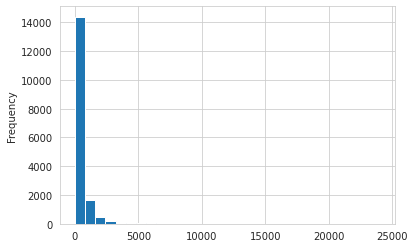

In [24]:
df['price'].plot(kind = 'hist', bins = 30)

<AxesSubplot:ylabel='Frequency'>

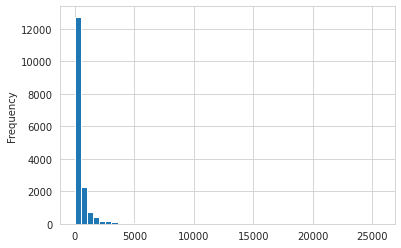

In [25]:
df['mrp'].plot(kind = 'hist', bins = 50)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mrp', ylabel='Density'>

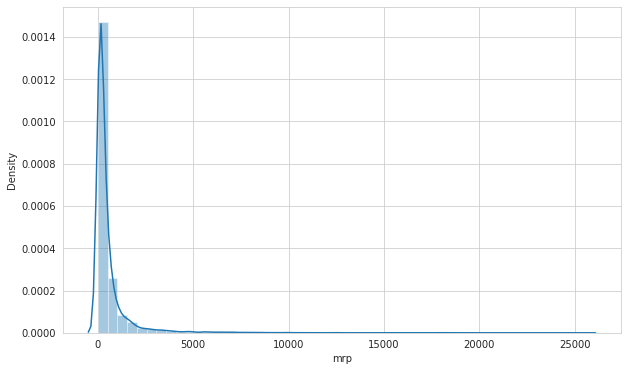

In [26]:
plt.figure(figsize=(10, 6))
sns.distplot(df['mrp'])

In [27]:
df['TypeOfPack'].value_counts()

tablets     5933
capsules    4315
Powder      1381
Syrup       1187
gummies      471
            ... 
pellets        1
ir             1
Strip          1
combikit       1
Salt           1
Name: TypeOfPack, Length: 98, dtype: int64

<AxesSubplot:xlabel='count', ylabel='TypeOfPack'>

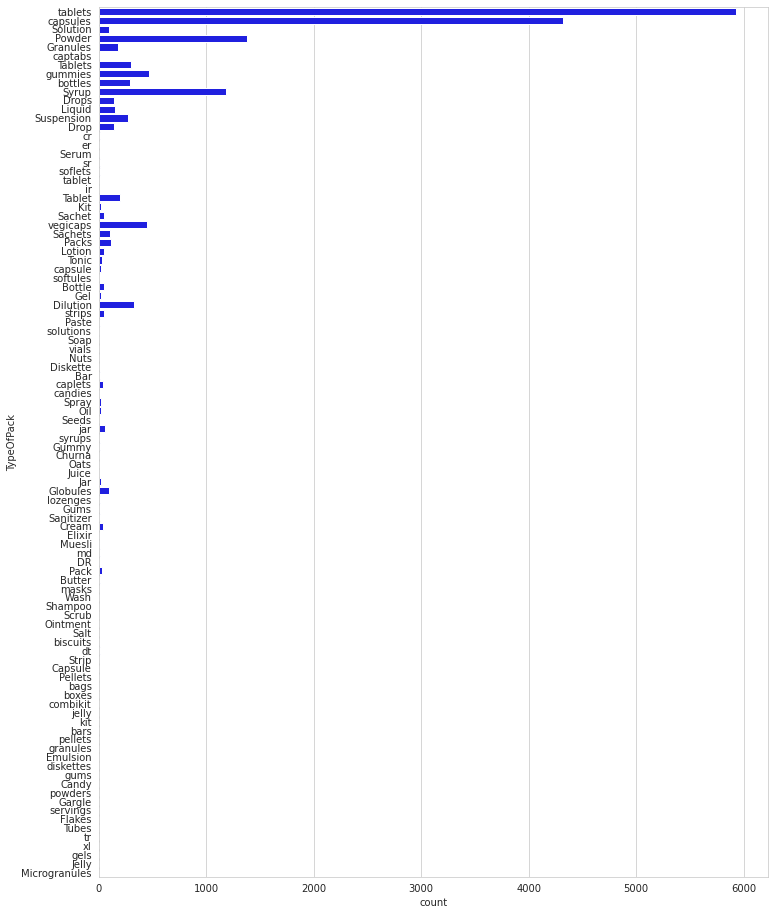

In [28]:
plt.figure(figsize=(12, 16))
sns.countplot(y = df['TypeOfPack'], color = 'Blue')

**Bivariate Analysis**

Bivariate graphs display the relationship between two variables.

The type of graph will depend on the measurement level of the variables (categorical or quantitative).

<AxesSubplot:xlabel='mrp', ylabel='TypeOfPack'>

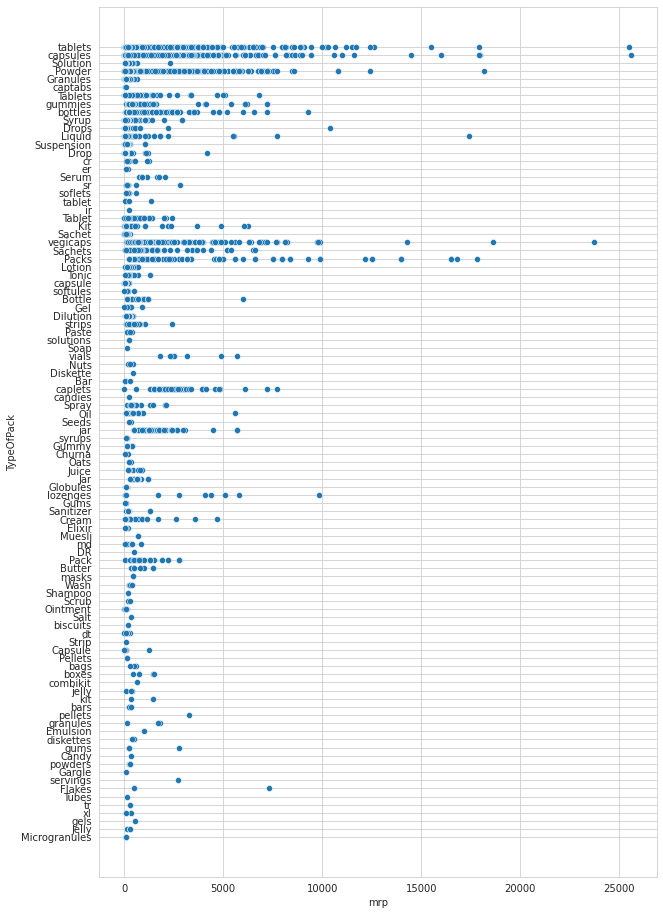

In [29]:
plt.figure(figsize = (10, 16))
sns.scatterplot(x = df['mrp'], y = df['TypeOfPack'])

<AxesSubplot:xlabel='mrp', ylabel='TypeOfPack'>

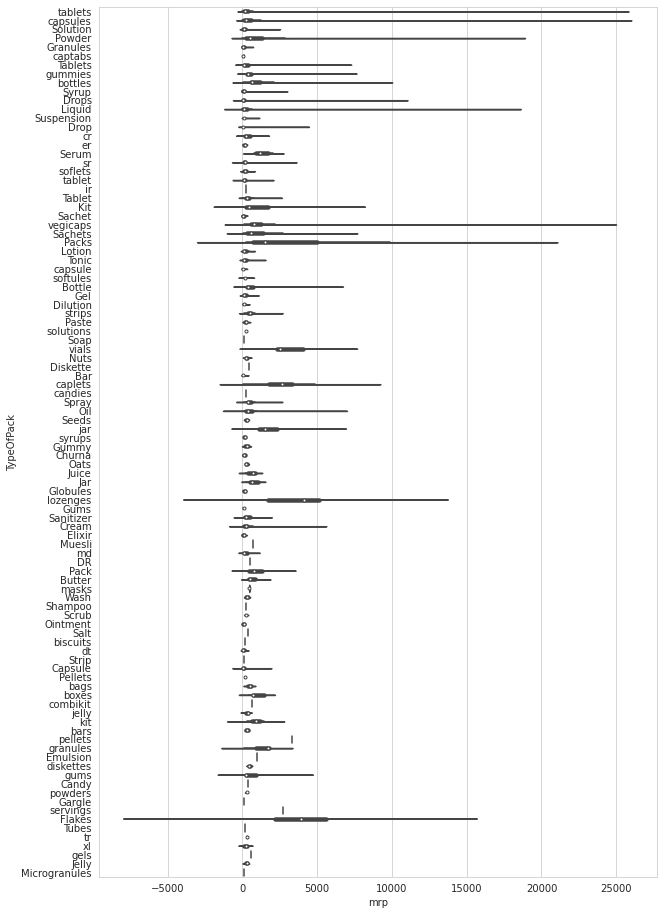

In [30]:
plt.figure(figsize=(10, 16))
sns.violinplot(y = df['TypeOfPack'], x = df['mrp'])

In [31]:
px.scatter(x = df['mrp'], y = df['TypeOfPack'], color = df['rating'])

In [32]:
px.scatter(df['mrp'], color = df['TypeOfPack'])

In [33]:
px.scatter(color = df['TypeOfPack'], y=df['price'])